## Main Question

> A candidate that we are considering to hire is asking for a salary of 160,000 US dollars per year. He justifies this by claiming that he earned the same amount at his previous company! The person/candidate has worked as region manager for two years!  

> **Is his claim true or is it a bluff?**

## Data Understaing

**1.0. What is the domain area of the dataset?**  
The dataset *Position_Salaries.csv* contains information about different salaries at a company for different positions!  

**1.1. Under which circumstances was it collected?**  
It was obtained through different websites!  

**2.0. Which data format?**  
The data is in *CSV* format!  

In [35]:
# Importinc necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing the dataset
position_dataset = pd.read_csv("../Datasets/Position_Salaries.csv")

## Basic Exploratory Data Analysis

In [3]:
position_dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
position_dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
print(f"Number of features in the dataset is {position_dataset.shape[1]} and the number of observations/rows in the dataset is {position_dataset.shape[0]}")

Number of features in the dataset is 3 and the number of observations/rows in the dataset is 10


#### Checking Missing Values

In [6]:
position_dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
position_dataset.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [12]:
X = position_dataset.iloc[:, 1:-1].values  # DEPENDENT VARIABLE
y = position_dataset.iloc[:, -1].values # INDEPENDENT VARIABLE

In [14]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [15]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature Scaling Needed

X variable has a range between **1 to 10**!  
y variable has a range between **45000 to 1000000**!

> The goal is to ensure that all features have a similar scale so that no particular feature dominates others when a model is being trained!  

In [17]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [18]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


**Before we scale** the *y* variable, we need to **reshape** it first because *StandardScaler* requires a **2D** array!  

In [20]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [21]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [22]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


#### Visualizing the the relationship between X and y

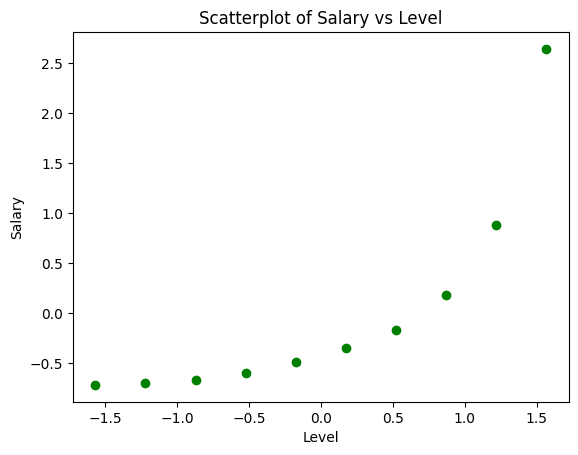

In [24]:
plt.scatter(X, y, color='green')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Scatterplot of Salary vs Level')
plt.show()

* The relationship is **non-linear**!
* We need to use a **kernel** function!
    * **Kernel** is a function that used to transform the input data into a higher-dimensional space where it becomes easier to solve the problem!  

> We are using the whole dataset for building and training the model, because the number of observations is not big enough for *splitting* the dataset!  

## Model Building

In [ ]:
svr_model = SVR(kernel= 'rbf') 
# RBF kernel maps the data into an infinite-dimensional space, making it very flexible and capable of modeling complex, non-linear relationships.
svr_model.fit(X, y)

### Main Question:

> A candidate that we are considering to hire is asking for a salary of 160,000 US dollars per year. He justifies this by claiming that he earned the same amount at his previous company! The person/candidate has worked as region manager for two years!  

> **Is his claim true or is it a bluff?**

### Answer

* **Predicting how much he should earn by Support Vector Regression**

He has worked as as region manager for over two years, therefore the position is *6.5* now!  
In other words his salary now must between 150,000 to 200,000!  

In [28]:
y_pred = sc_y.inverse_transform(svr_model.predict(sc_X.transform([[6.5]])).reshape(-1, 1))

In [31]:
print("The predicted salary by SUPPORT VECTOR REGRESSION for the candidate is:", round(y_pred[0][0]), "US Dollars") 

The predicted salary by SUPPORT VECTOR REGRESSION for the candidate is: 170370 US Dollars


> The candidate's claim about its salary is **reasonable**!  
> His new salary should be around **160,000 to 170,000 US Dollars**!  

## Visualizing the SVR results

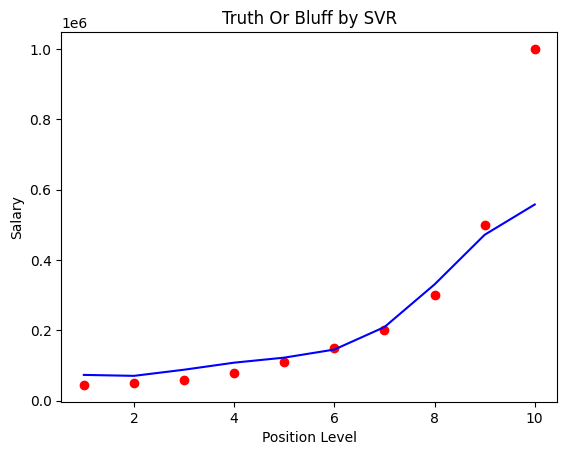

In [33]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = "red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr_model.predict(X).reshape(-1, 1)), 
        color = "blue")
plt.title('Truth Or Bluff by SVR')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Model Evaluation

In [41]:
y_pred_scaled = svr_model.predict(X)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: ", round(mse, 2))

Mean Squared Error:  75289554858.61
